<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

Prediction of House Price Using Linear Regression

# Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "../Data/Sacramento_transactions.csv"
df = pd.read_csv(house_csv)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
# Data Types
# Hint: Look into the columns zip, sale_date & beds
df.shape
df.info()
df.describe()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


street       981
city          39
zip           68
state          1
beds           8
baths          6
sq__ft       603
type           4
sale_date      5
price        605
latitude     969
longitude    967
dtype: int64

In [4]:
# Feature Engineering
df.sale_date

0      Wed May 21 00:00:00 EDT 2008
1      Wed May 21 00:00:00 EDT 2008
2      Wed May 21 00:00:00 EDT 2008
3      Wed May 21 00:00:00 EDT 2008
4      Wed May 21 00:00:00 EDT 2008
                   ...             
980    Thu May 15 00:00:00 EDT 2008
981    Thu May 15 00:00:00 EDT 2008
982    Thu May 15 00:00:00 EDT 2008
983    Thu May 15 00:00:00 EDT 2008
984    Thu May 15 00:00:00 EDT 2008
Name: sale_date, Length: 985, dtype: object

In [5]:
NewSaleDate = pd.to_datetime(df.sale_date)
NewSaleDate

C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


0     2008-05-21
1     2008-05-21
2     2008-05-21
3     2008-05-21
4     2008-05-21
         ...    
980   2008-05-15
981   2008-05-15
982   2008-05-15
983   2008-05-15
984   2008-05-15
Name: sale_date, Length: 985, dtype: datetime64[ns]

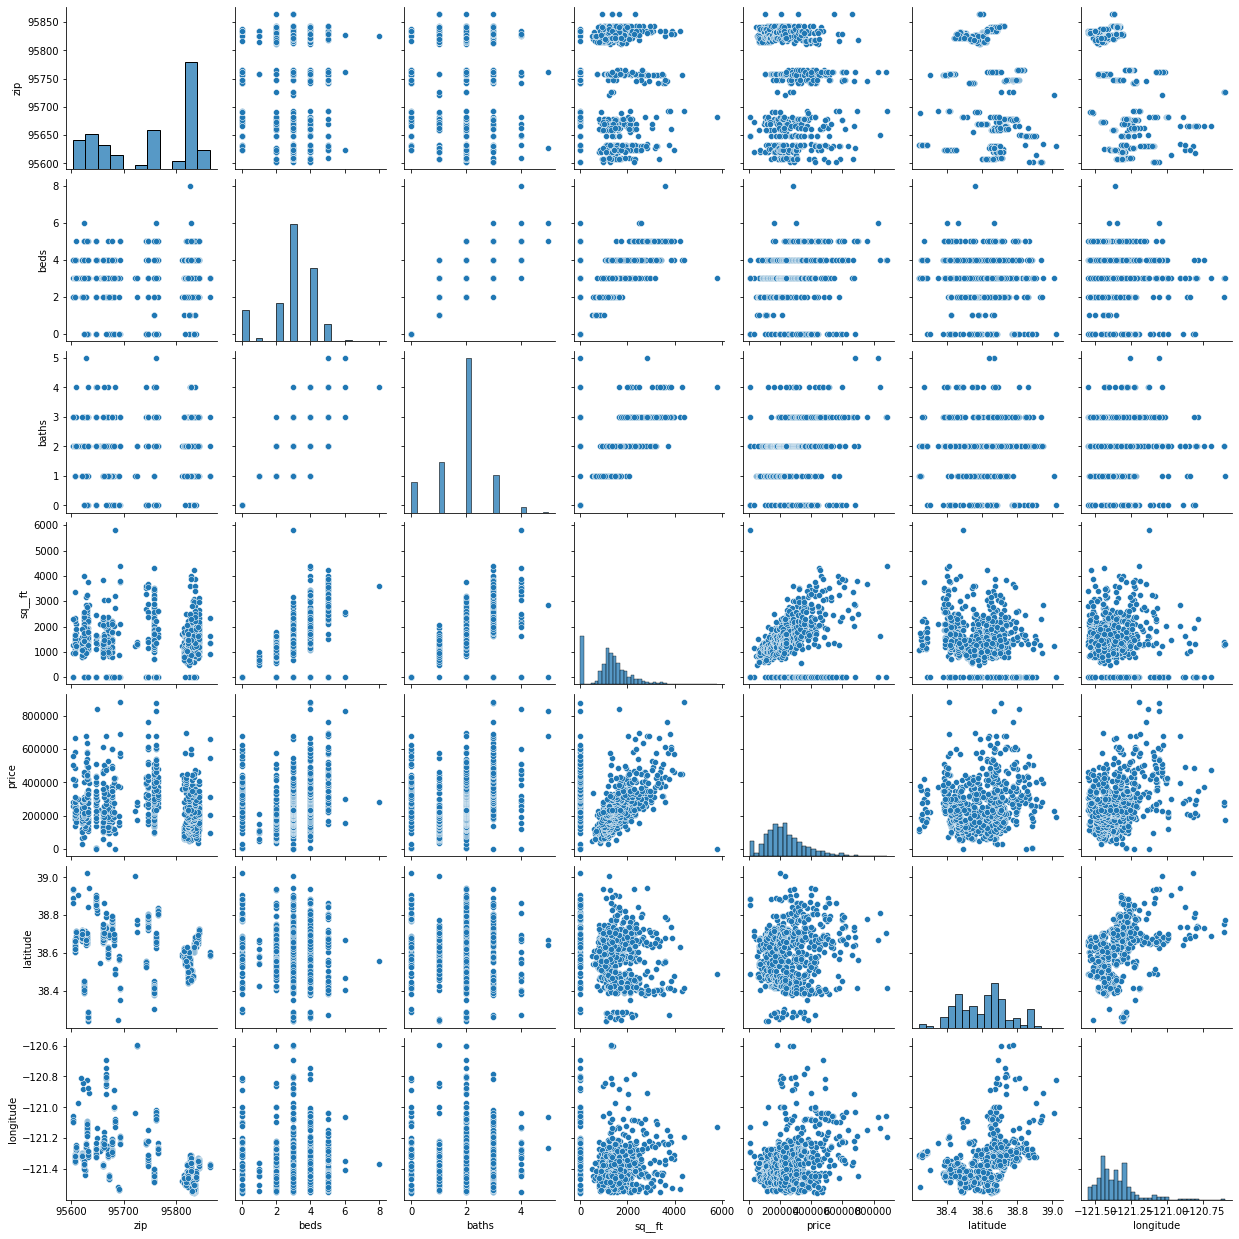

In [6]:
sns.pairplot(data=df)

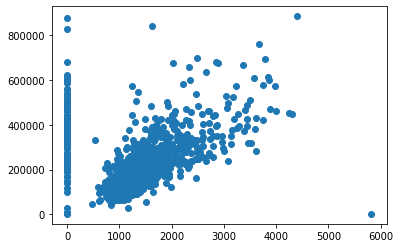

In [26]:
# Perform EDA
# price and sq__ft
X = df.sq__ft
y = df.price
plt.scatter(X, y)

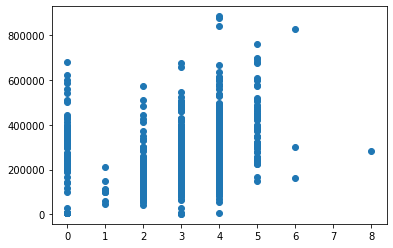

In [8]:
X = df.beds
y = df.price
plt.scatter(x, y)

(array([108.,  10., 133., 413., 258.,  59.,   3.,   1.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 8 artists>)

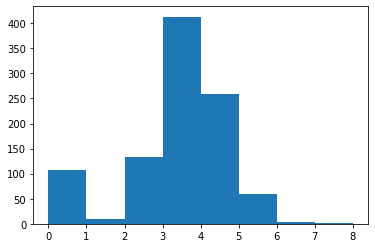

In [9]:
plt.hist(df.beds, bins=8)

# Predict Price

We are going to predict `price` from available information.

## What is the Target Variable? Why?

## List all possible variables which might be Predictor variable.

## Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

<AxesSubplot:>

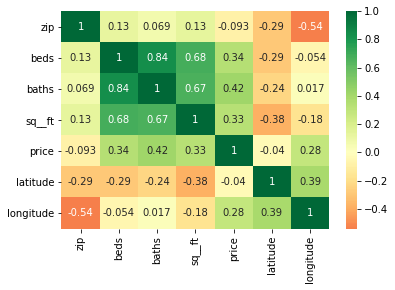

In [10]:
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

## What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

## Find Residuals

Find difference between actual value and predicted value. Use absolute value.

(array([ 96., 269., 304., 160.,  76.,  43.,  22.,  10.,   1.,   4.]),
 array([  1551. ,  89874.9, 178198.8, 266522.7, 354846.6, 443170.5,
        531494.4, 619818.3, 708142.2, 796466.1, 884790. ]),
 <BarContainer object of 10 artists>)

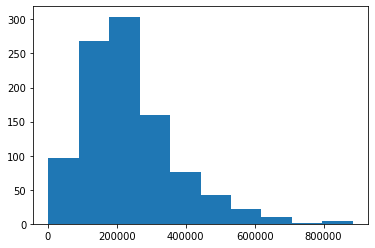

In [11]:
# ANSWER
plt.hist(df.price)

## Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

$$\hat{y} = \beta_0 + \beta_1 x$$

where

> $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

### Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [14]:
# ANSWER
X = df.sq__ft
y = df.price

### Calculate beta_1

$$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [15]:
# ANSWER
def calculate_b1(x:pd.Series, y:pd.Series) -> np.float64:

        xbar = np.mean(x)
        ybar = np.mean(y)
        
        return np.sum((y - ybar) * (x-xbar)) / \
            np.sum(np.square(x-xbar))

In [27]:
b1 = calculate_b1(X,y)

### Calculate beta_0

$$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [28]:
# ANSWER
def calculate_b0(x:pd.Series, y:pd.Series) -> np.float64:

        xbar = np.mean(x)
        ybar = np.mean(y)
        
        return ybar - calculate_b1(x,y) * xbar
b0 = calculate_b0(x,y)
b0


128792.15948942926

### Find Yhat (Predicted Value Using Beta 0 and Beta 1)

$$\hat{y} = \beta_0 + \beta_1 x$$

In [29]:
# ANSWER
def calculate_yhat(x: pd.Series, b0: np.float64, b1: np.float64) -> pd.Series:
    return b0 + b1 * x
yhat = calculate_yhat(X, b0, b1)

In [30]:
yhat

0      174068.782269
1      191995.292006
2      171902.436681
3      174935.320504
4      171956.595321
           ...      
980    252273.857979
981    208784.470309
982    194649.065351
983    220049.467365
984    202556.226745
Name: sq__ft, Length: 985, dtype: float64

### Find Residuals

$$ \text{residual}_i = y_i - \hat{y}_i$$

In [31]:
# ANSWER ??
def calculate_residual(y: pd.Series, yhat: pd.Series) -> pd.Series:
    return abs(y-yhat)
residuals = calculate_residual(y, yhat)
residuals

0      114846.782269
1      123783.292006
2      103022.436681
3      105628.320504
4       90056.595321
           ...      
980     19848.857979
981     25215.529691
982     40350.934649
983     15251.532635
984     33181.773255
Length: 985, dtype: float64

### Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

$$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

$$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [32]:
# ANSWER
def Cal_Total_Sumofsquare(y:pd.Series) -> np.float64:
    Ybar: np.float = np.mean(y)
    SStot = np.square(y-Ybar)
    SStot = np.sum(SStot)
    return SStot

def Cal_Residual_Sumofsquare(y:pd.Series, yhat:pd.Series) -> np.float64:
    SSres = np.square(y-yhat)
    SSres = np.sum(SSres)
    return SSres


def Cal_Rsquare(y:pd.Series, yhat:pd.Series) -> np.float64:
    SStot = Cal_Total_Sumofsquare(y)
    SSres = Cal_Residual_Sumofsquare(y, yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [33]:
Cal_Rsquare(y, yhat)

0.05055319387116508

### [BONUS] Draw Plot of Predicted Line

In [34]:
# ANSWER
def get_prediction(x):
    return b0 + b1*x

### [BONUS] Draw Plot of Predicted Line With Residuals

Text(0, 0.5, 'price')

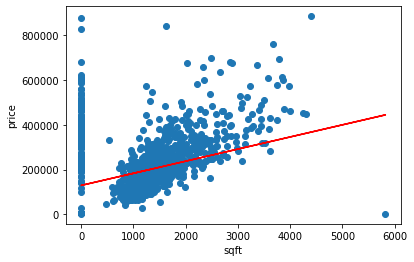

In [35]:
# ANSWER
predicted_y = get_prediction(X)

plt.scatter(X,y)
plt.plot(X, predicted_y, color='red')
plt.xlabel('sqft')
plt.ylabel('price')

In [36]:
df['yhat'] = yhat

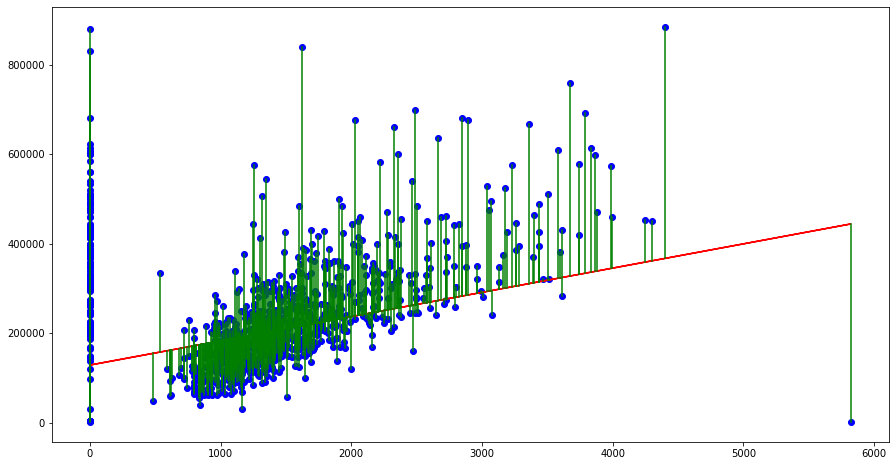

In [37]:
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

ax = fig.gca()

ax.scatter(X, y, c='b')
ax.plot(X, yhat, color='r');

for _, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['yhat']), 'g-')

### Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [38]:
# ANSWER
# This is estimated $250,000

## Find Coefficient and Intercept using Linear SKLearn Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

In [40]:
X = df[['sq__ft']]
y = df[['price']]
X, y

(     sq__ft
 0       836
 1      1167
 2       796
 3       852
 4       797
 ..      ...
 980    2280
 981    1477
 982    1216
 983    1685
 984    1362
 
 [985 rows x 1 columns],
       price
 0     59222
 1     68212
 2     68880
 3     69307
 4     81900
 ..      ...
 980  232425
 981  234000
 982  235000
 983  235301
 984  235738
 
 [985 rows x 1 columns])

In [41]:
# ANSWER
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [42]:
#reg.coef_
lr.intercept_, lr.coef_

(array([162930.161407]), array([[54.15863969]]))

### Find R Score

In [43]:
# ANSWER
lr.score(X,y)

0.11148717682951437

# Splitting Data

In [44]:
# ANSWER
from sklearn.model_selection import train_test_split

## Create training and testing subsets

Hint: Using `train_test_split` Library

In [45]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Check Shape, Sample of Test Train Data

In [46]:
# ANSWER
X_test.shape

(197, 1)

## Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [47]:
# ANSWER
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.10757991871143469

## Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

What is the predicted value of that house?

In [48]:
# ANSWER
y_pred = lr.predict([[1204]])
y_pred

array([[227191.57885638]])

## Find the error

In [49]:
# ANSWER
# Predict price from X_test
y_pred = lr.predict(X_test)
y_pred[:10]

array([[232644.23080238],
       [226977.7493683 ],
       [162828.90294481],
       [311974.97087943],
       [162828.90294481],
       [162828.90294481],
       [244191.02315861],
       [207733.09544125],
       [202708.10247141],
       [305025.51251689]])

In [50]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE :", mse)
print("RMSE :", rmse)

MSE : 17340670586.892506
RMSE : 131683.9799933633
